In [1]:
import pandas as pd

In [6]:
df = pd.read_csv("C:/Users/Admin/Projects/ML projects/ml-project-02/feature-engineering.csv")

In [7]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [10]:
df.dtypes

SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
tenure                                     int64
PhoneService                               int64
MultipleLines                              int64
OnlineSecurity                             int64
OnlineBackup                               int64
DeviceProtection                           int64
TechSupport                                int64
StreamingTV                                int64
StreamingMovies                            int64
PaperlessBilling                           int64
MonthlyCharges                           float64
TotalCharges                             float64
Churn                                      int64
gender_Male                                 bool
InternetService_Fiber optic                 bool
InternetService_No                          bool
Contract_One year                           bool
Contract_Two year   

In [9]:
df = pd.get_dummies(
    df, columns=[
        'gender','InternetService','Contract','PaymentMethod'
    ], 
    drop_first=True
)

In [11]:
x = df.drop(['Churn'],axis=1)

In [12]:
y = df['Churn']

In [13]:
x.select_dtypes(include='object').columns

Index([], dtype='object')

In [14]:
x.dtypes

SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
tenure                                     int64
PhoneService                               int64
MultipleLines                              int64
OnlineSecurity                             int64
OnlineBackup                               int64
DeviceProtection                           int64
TechSupport                                int64
StreamingTV                                int64
StreamingMovies                            int64
PaperlessBilling                           int64
MonthlyCharges                           float64
TotalCharges                             float64
gender_Male                                 bool
InternetService_Fiber optic                 bool
InternetService_No                          bool
Contract_One year                           bool
Contract_Two year                           bool
PaymentMethod_Credit

In [15]:
bool_columns = x.select_dtypes(include='bool').columns

In [16]:
x[bool_columns] = x[bool_columns].astype(int)

In [17]:
x.dtypes

SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
tenure                                     int64
PhoneService                               int64
MultipleLines                              int64
OnlineSecurity                             int64
OnlineBackup                               int64
DeviceProtection                           int64
TechSupport                                int64
StreamingTV                                int64
StreamingMovies                            int64
PaperlessBilling                           int64
MonthlyCharges                           float64
TotalCharges                             float64
gender_Male                                int64
InternetService_Fiber optic                int64
InternetService_No                         int64
Contract_One year                          int64
Contract_Two year                          int64
PaymentMethod_Credit

In [19]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=42,stratify=y)


In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [21]:
numerical_columns = ['tenure','TotalCharges','MonthlyCharges']

In [22]:
x_train[numerical_columns] = scaler.fit_transform(x_train[numerical_columns])

In [23]:
x_test[numerical_columns] = scaler.transform(x_test[numerical_columns])

In [24]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [25]:
y_pred = lr_model.predict(x_test)
y_prob = lr_model.predict_proba(x_test)[:,1]

In [26]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_auc_score

print(f"Accuracy Score: {accuracy_score(y_test,y_pred)}")
print(f"Precision Score: {precision_score(y_test,y_pred)}")
print(f"Recall Score: {recall_score(y_test,y_pred)}")
print(f"ROC & AUC Score: {roc_auc_score(y_test,y_pred)}")

Accuracy Score: 0.8055358410220014
Precision Score: 0.6582278481012658
Recall Score: 0.5561497326203209
ROC & AUC Score: 0.7259009532666822


In [32]:
from sklearn.metrics import confusion_matrix,classification_report

confusion_matrix(y_test,y_pred)

array([[927, 108],
       [166, 208]])

In [29]:
import pandas as pd
feature_importance = pd.Series(
    lr_model.coef_[0],
    index=x_train.columns).sort_values(ascending = False)
feature_importance.head(10)

InternetService_Fiber optic       1.048222
TotalCharges                      0.517328
PaymentMethod_Electronic check    0.386210
PaperlessBilling                  0.374022
MultipleLines                     0.334506
StreamingTV                       0.321855
StreamingMovies                   0.321588
SeniorCitizen                     0.144989
PaymentMethod_Mailed check        0.071520
Partner                           0.023780
dtype: float64

In [30]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200,random_state=42,class_weight='balanced')
rfc.fit(x_train,y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [31]:
y_pred_rfc = rfc.predict(x_test)

In [33]:
print("Accuracy: ",accuracy_score(y_test,y_pred_rfc))
print(confusion_matrix(y_test,y_pred_rfc))
print(classification_report(y_test,y_pred_rfc))

Accuracy:  0.7842441447835344
[[926 109]
 [195 179]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1035
           1       0.62      0.48      0.54       374

    accuracy                           0.78      1409
   macro avg       0.72      0.69      0.70      1409
weighted avg       0.77      0.78      0.77      1409



In [34]:
y_prob_rfc = rfc.predict_proba(x_test)[:,1]

In [35]:
import numpy as np

threshold = 0.35
y_pred_custom = (y_prob_rfc >= threshold).astype(int)

In [36]:
print(confusion_matrix(y_test,y_pred_custom))
print(classification_report(y_test,y_pred_custom))

[[830 205]
 [125 249]]
              precision    recall  f1-score   support

           0       0.87      0.80      0.83      1035
           1       0.55      0.67      0.60       374

    accuracy                           0.77      1409
   macro avg       0.71      0.73      0.72      1409
weighted avg       0.78      0.77      0.77      1409



In [37]:
feature_importance_rfc = pd.Series(
    rfc.feature_importances_,
    index=x_train.columns).sort_values(ascending = False)
feature_importance_rfc.head(10)

TotalCharges                      0.175737
MonthlyCharges                    0.164988
tenure                            0.164836
Contract_Two year                 0.062854
InternetService_Fiber optic       0.055024
PaymentMethod_Electronic check    0.039575
Contract_One year                 0.031865
PaperlessBilling                  0.027070
gender_Male                       0.025929
OnlineSecurity                    0.024810
dtype: float64

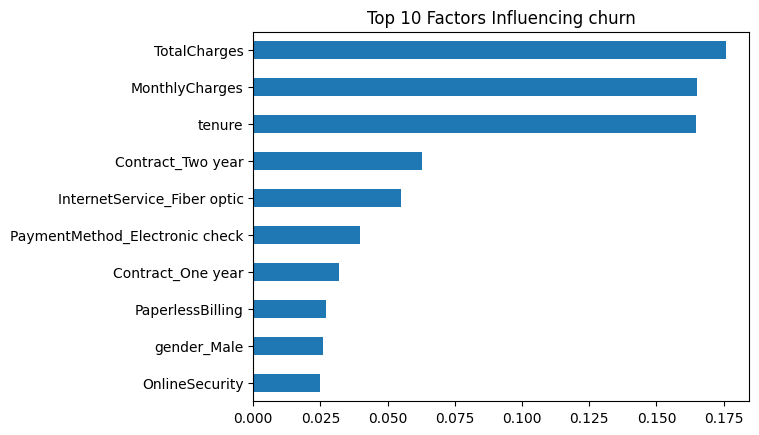

In [38]:
import matplotlib.pyplot as plt 

feature_importance_rfc.head(10).plot(kind = 'barh')
plt.gca().invert_yaxis()
plt.title("Top 10 Factors Influencing churn")
plt.show()

In [41]:
import pickle

# Save model
with open("model.pkl", "wb") as f:
    pickle.dump(rfc, f)

# Save feature names
with open("features.pkl", "wb") as f:
    pickle.dump(x_train.columns.tolist(), f)
